In [57]:
from PyDBDdim.utils import DimensionlessLearning
import torch
torch.manual_seed(0)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings("ignore")


In [58]:
#df = pd.ExcelFile(r"mass_balance_params.xlsx")
df_2 = pd.ExcelFile(r"data_from_EB_looping.xlsx")
df_y = pd.ExcelFile(r"energy_balance_params.xlsx")


In [59]:
# df_train_x['u_B_m_s'] = df_train_x['u_B_m_s'] / 1000 if np.min(df_train_x['u_B_m_s']) > 0 else df_train_x['u_B_m_s'] / 1000 - (np.min(df_train_x['u_B_m_s']) / 1000-1e-5)
# df_train_x['A_tot_m2'] = 1.
# df_train_x['t_a_s'] = df_train_x['t_a_s'] / 1e-7 if np.min(df_train_x['t_a_s']) > 0 else df_train_x['t_a_s'] / 1e-7 - (np.min(df_train_x['t_a_s']) / 1e-7-1e-5)
# df_train_x['t_b_s'] = df_train_x['t_b_s'] / 1e-4 if np.min(df_train_x['t_b_s']) > 0 else df_train_x['t_b_s'] / 1e-4 - (np.min(df_train_x['t_b_s']) / 1e-4-1e-5)
# df_train_x['Volume_m3'] = 1.
# df_train_x['K_iz_a_m3_s_atom'] = df_train_x['K_iz_a_m3_s_atom'] / 1e-15 if np.min(df_train_x['K_iz_a_m3_s_atom']) > 0 else df_train_x['K_iz_a_m3_s_atom'] / 1e-15 - (np.min(df_train_x['K_iz_a_m3_s_atom']) / 1e-15-1e-5)

# df_train_x['K_2_iz_a_m3_s_atom'] = df_train_x['K_2_iz_a_m3_s_atom'] / 1e-15 if np.min(df_train_x['K_2_iz_a_m3_s_atom']) > 0 else df_train_x['K_2_iz_a_m3_s_atom'] / 1e-15 - (np.min(df_train_x['K_2_iz_a_m3_s_atom']) / 1e-15-1e-5)

# df_train_x['K_iz_exc_a_m3_s_atom'] = df_train_x['K_iz_exc_a_m3_s_atom'] / 1e-14 if np.min(df_train_x['K_iz_exc_a_m3_s_atom']) > 0 else df_train_x['K_iz_exc_a_m3_s_atom'] / 1e-14 - (np.min(df_train_x['K_iz_exc_a_m3_s_atom']) / 1e-14-1e-5)

# df_train_x['n_sa_atoms_m3'] = df_train_x['n_sa_atoms_m3'] / 1e10 if np.min(df_train_x['n_sa_atoms_m3']) > 0 else df_train_x['n_sa_atoms_m3'] / 1e10 - (np.min(df_train_x['n_sa_atoms_m3']) / 1e10-1e-5)

# df_train_x['n_sb_atoms_m3'] = df_train_x['n_sb_atoms_m3'] / 1e10 if np.min(df_train_x['n_sb_atoms_m3']) > 0 else df_train_x['n_sb_atoms_m3'] / 1e10 - (np.min(df_train_x['n_sb_atoms_m3']) / 1e10-1e-5)

# df_train_x['A_a_m2'] = 1.

# df_train_x['A_b_m2'] = 1.

# df_train_x['n_He_exc_a_atoms_m3'] = df_train_x['n_He_exc_a_atoms_m3'] / 1e17 if np.min(df_train_x['n_He_exc_a_atoms_m3']) > 0 else df_train_x['n_He_exc_a_atoms_m3'] / 1e17 - (np.min(df_train_x['n_He_exc_a_atoms_m3']) / 1e17-1e-5)

def rescale(g):
    for i in range(0,g.shape[1]):
        if np.min(np.abs(g[:,i])) ==0:
            n = 0
        else:
            n = np.mean((np.log10(np.min(np.abs(g[:,i]))), np.log10(np.max(np.abs(g[:,i])))))
        if n<0:
                g[:,i] = g[:,i]/10**np.ceil(n) if np.min(g[:,i]) > 0 else g[:,i]/10**np.ceil(n) - (np.min(g[:,i]) / 10**np.ceil(n)-1e-5)
        else:
            g[:,i] = g[:,i]/10**np.floor(n) if np.min(g[:,i]) > 0 else g[:,i]/10**np.floor(n) - (np.min(g[:,i]) / 10**np.floor(n)-1e-5)
    return g

def rescale_vec(g):
    if np.min(np.abs(g)) ==0:
        n = 0
    else:
        n = np.mean((np.log10(np.min(np.abs(g))), np.log10(np.max(np.abs(g)))))
    if n<0:
            g= g/10**np.ceil(n) if np.min(g) > 0 else g/10**np.ceil(n) - (np.min(g) / 10**np.ceil(n)-1e-5)
    else:
        g = g/10**np.floor(n) if np.min(g) > 0 else g/10**np.floor(n) - (np.min(g) / 10**np.floor(n)-1e-5)
    return g

In [60]:
#                   0             1           2                    3                   4                   5           6                7                    8                     9                        10                  11                  12                      13                          
#df1_names = [ 't_a_seconds', 'Q_a_As', 'V_p_ta_kgm2_s3_A','T_e_a_kgm2_s3_A', 'n_He_exc_a_atoms_m3', 'u_B_a_m_s', 'v_e_a_m_s', 'K_2_iz_a_m3_s_atom','K_loss_a_m6_s_atom2', 'K_iz_exc_a_m3_s_atom', 'K_exc_a_m3_s_atom', 'K_iz_a_m3_s_atom', 'K_elastic_a_m3_s_atom', 'E_elastic_a_kgm2_s2' ]


df_time_a = rescale(np.array(pd.read_excel(df_2, sheet_name='time_a_data').iloc[:,1:]))
df_time_a_units = np.array(pd.read_excel(df_2, sheet_name='time_a_data_units').iloc[:,1:])
df_time_a_n = pd.read_excel(df_2, sheet_name='time_a_data_names').iloc[:,1:]
time_a_n= [df_time_a_n.iloc[0,i] for i in range(0,df_time_a_n.shape[1])]
#print(df_time_a_n)
#print(df_time_a_units)


#                   0             1                2               3                   4              5          6             7                   8                    9                       10              11                   12                   13                  
#df2_names =  [ 't_b_seconds', 'Q_b_As', 'V_p_tb_kgm2_s3_A','T_e_kgm2_s3_A', 'n_He_exc_atoms_m3', 'u_B_m_s', 'v_e_m_s','K_2_iz_m3_s_atom','K_loss_m6_s_atom2', 'K_iz_exc_m3_s_atom', 'K_exc_m3_s_atom', 'K_iz_m3_s_atom', 'K_elastic_m3_s_atom', 'E_elastic_kgm2_s2' ]
df_time_b = rescale(np.array(pd.read_excel(df_2, sheet_name='time_b_data').iloc[:,1:]))
df_time_b_units = np.array(pd.read_excel(df_2, sheet_name='time_b_data_units').iloc[:,1:])
df_time_b_n = pd.read_excel(df_2, sheet_name='time_b_data_names').iloc[:,1:]
time_b_n= [df_time_b_n.iloc[0,i] for i in range(0,df_time_b_n.shape[1])]


#                    0                   1                 2               3                 4               5               6                 7                  8           9        10        11                12                   13               14                   
#df3_names = ['E_period_kgm2_s2', 'n_sa_atoms_m3','n_sb_atoms_m3', 'n_e_electrons_m3', 'n_g_atoms_m3', 'T_g_kelvin', 'E_iz_kgm2_s2', 'E_iz_exc_kgm2_s2', 'E_exc_kgm2_s2', 'e_c_As', 'm_e_kg', 'M_He_kg',  'epsilon_A2s4_kg_m3', 'eps_0_A2s4_kg_m3', 'k_b_kgm2_s2_K']
df_other = rescale(np.array(pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]))
df_other_units = np.array(pd.read_excel(df_2, sheet_name='other_data_units').iloc[:,1:])
df_other_n = pd.read_excel(df_2, sheet_name='other_data_names').iloc[:,1:]
other_n= [df_other_n.iloc[0,i] for i in range(0,df_other_n.shape[1])]

#                    0                 1             2        3        4         5            6            7            8               9              10                 11                      12                      
#df4_names = ['Volume_rxtor_m2', 'V_all_beads_m2','A_a_m2','A_b_m2', 'h_m', 'Volume_m3', 'A_bead_m2', 'A_tot_m3', 'frequency_Hz', 'Flow_m3_s', 'temp_C_gas_K', 'Set_Voltage_kgm2_s3_A', 'pulse_time_seconds' ]
df_exp = rescale(np.array(pd.read_excel(df_2, sheet_name='Experiment_Design_data').iloc[:,1:]))
df_exp_units = np.array(pd.read_excel(df_2, sheet_name='Experiment_Data_units').iloc[:,1:])
df_exp_n = pd.read_excel(df_2, sheet_name='Experiment_Data_names').iloc[:,1:]
exp_n= [df_exp_n.iloc[0,i] for i in range(0,df_exp_n.shape[1])]





#energy balance terms
#now to construct  'Volume_m3', 'n_e_atoms_m3', 'n_g_atoms_m3', 'e_c_As', 'A_tot', 'E_kgm2_s2_atom', 'y_exc_a_kgm5_s3_atoms2', 'y_iz_a_kgm5_s3_atoms2', 'y_iz_exc_a_kgm5_s3_atoms2', 'y_elastic_kgm5_s3_atoms2', 't_a_s', 'n_sa_atoms_m3', 'n_sb_atoms_m3', 'V_p_ta_volts', 't_b_s', 'u_B_m_s', 'V_p_tb_volts', 'v_e_m_s', 'n_He_exc_a_atoms_m3'  
a = df_time_b[:,5].shape[0] #this is just the number of data points

# get gamma's!
gammas= rescale(np.array(pd.read_excel(df_y, sheet_name='inputs').iloc[:,1:]))

y_exc_a = gammas[:,8] #K_exc_a * E_exc_a
y_exc_a_units = np.array([5,-3,-2,1,0,0])

y_iz_a = gammas[:,9]#K_iz_a*E_iz
y_iz_a_units = np.array([5,-3,-2,1,0,0])

y_iz_exc_a = gammas[:,10]#K_iz_exc_a*E_iz_exc
y_iz_exc_a_units = np.array([5,-3,-2,1,0,0])

y_elastic = gammas[:,11]#K_elastic*E_elastic
y_elastic_units = np.array([5,-3,-2,1,0,0])

inputs = np.hstack((df_exp[:,5].reshape(a,1),df_other[:,3].reshape(a,1),df_other[:,4].reshape(a,1),df_other[:,9].reshape(a,1),df_exp[:,7].reshape(a,1),df_other[:,0].reshape(a,1),y_exc_a.reshape(a,1),y_iz_a.reshape(a,1),y_iz_exc_a.reshape(a,1),y_elastic.reshape(a,1),df_time_a[:,0].reshape(a,1), df_other[:,1].reshape(a,1), df_other[:,2].reshape(a,1),df_time_a[:,2].reshape(a,1),df_time_b[:,0].reshape(a,1), df_time_b[:,5].reshape(a,1),df_time_b[:,2].reshape(a,1),df_time_b[:,6].reshape(a,1),df_time_a[:,4].reshape(a,1)))
D_in = np.hstack((df_exp_units[:,5].reshape(6,1),df_other_units[:,3].reshape(6,1),df_other_units[:,4].reshape(6,1),df_other_units[:,9].reshape(6,1),df_exp_units[:,7].reshape(6,1),df_other_units[:,0].reshape(6,1),y_exc_a_units.reshape(6,1),y_iz_a_units.reshape(6,1),y_iz_exc_a_units.reshape(6,1),y_elastic_units.reshape(6,1),df_time_a_units[:,0].reshape(6,1),df_other_units[:,1].reshape(6,1),df_other_units[:,2].reshape(6,1),df_time_a_units[:,2].reshape(6,1),df_time_b_units[:,0].reshape(6,1),df_time_b_units[:,5].reshape(6,1),df_time_b_units[:,2].reshape(6,1),df_time_b_units[:,6].reshape(6,1),df_time_a_units[:,4].reshape(6,1)))
variables = [exp_n[5],other_n[3],other_n[4],other_n[9],exp_n[7],other_n[0],'y_exc_a_kgm5_s3_atoms2','y_iz_a_kgm5_s3_atoms2','y_iz_exc_a_kgm5_s3_atoms2','y_elastic_kgm5_s3_atoms2',time_a_n[0],other_n[1],other_n[2],time_a_n[2],time_b_n[0],time_b_n[5],time_b_n[2],time_b_n[6],time_a_n[4]]
print(variables)
print(D_in)






#base terms + F +K_iz, base terms: 'uB', 'Atot', 'ta', 'tb', 'Volume', 'Ka', 'K2a', 'Kexca', 'nsa', 'nsb',  'nHeexca,
#F is exp_n[9], K_iz is time_b_n[11]
#a = df_time_b[:,5].shape[0]
#inputs = np.hstack((df_time_b[:,5].reshape(a,1),df_exp[:,7].reshape(a,1),df_time_a[:,0].reshape(a,1),df_time_b[:,0].reshape(a,1),df_exp[:,5].reshape(a,1),df_time_a[:,11].reshape(a,1),df_time_a[:,7].reshape(a,1),df_time_a[:,9].reshape(a,1),df_other[:,1].reshape(a,1),df_exp[:,2].reshape(a,1),df_time_a[:,4].reshape(a,1),df_exp[:,9].reshape(a,1),df_time_b[:,11].reshape(a,1)))
#D_in = np.hstack((df_time_b_units[:,5].reshape(6,1),df_exp_units[:,7].reshape(6,1),df_time_a_units[:,0].reshape(6,1),df_time_b_units[:,0].reshape(6,1),df_exp_units[:,5].reshape(6,1),df_time_a_units[:,11].reshape(6,1),df_time_a_units[:,7].reshape(6,1),df_time_a_units[:,9].reshape(6,1),df_other_units[:,1].reshape(6,1),df_other_units[:,2].reshape(6,1),df_time_a_units[:,4].reshape(6,1),df_exp_units[:,9].reshape(6,1),df_time_b_units[:,11].reshape(6,1)))
#variables = [time_b_n[5],exp_n[7],time_a_n[0],time_b_n[0],exp_n[5],time_a_n[11],time_a_n[7],time_a_n[9],other_n[1],other_n[2],time_a_n[4],exp_n[9], time_b_n[11]]
#print(variables)
#print(D_in)


#base terms + F, base terms: 'uB', 'Atot', 'ta', 'tb', 'Volume', 'Ka', 'K2a', 'Kexca', 'nsa', 'nsb',  'nHeexca,
#F is exp_n[9]
#a = df_time_b[:,5].shape[0]
#inputs = np.hstack((df_time_b[:,5].reshape(a,1),df_exp[:,7].reshape(a,1),df_time_a[:,0].reshape(a,1),df_time_b[:,0].reshape(a,1),df_exp[:,5].reshape(a,1),df_time_a[:,11].reshape(a,1),df_time_a[:,7].reshape(a,1),df_time_a[:,9].reshape(a,1),df_other[:,1].reshape(a,1),df_exp[:,2].reshape(a,1),df_time_a[:,4].reshape(a,1),df_exp[:,9].reshape(a,1)))
#D_in = np.hstack((df_time_b_units[:,5].reshape(6,1),df_exp_units[:,7].reshape(6,1),df_time_a_units[:,0].reshape(6,1),df_time_b_units[:,0].reshape(6,1),df_exp_units[:,5].reshape(6,1),df_time_a_units[:,11].reshape(6,1),df_time_a_units[:,7].reshape(6,1),df_time_a_units[:,9].reshape(6,1),df_other_units[:,1].reshape(6,1),df_other_units[:,2].reshape(6,1),df_time_a_units[:,4].reshape(6,1),df_exp_units[:,9].reshape(6,1)))
#variables = [time_b_n[5],exp_n[7],time_a_n[0],time_b_n[0],exp_n[5],time_a_n[11],time_a_n[7],time_a_n[9],other_n[1],other_n[2],time_a_n[4],exp_n[9]]
#print(variables)
#print(D_in)


#base terms  'uB', 'Atot', 'ta', 'tb', 'Volume', 'Ka', 'K2a', 'Kexca', 'nsa', 'nsb',  'nHeexca,
#a = df_time_b[:,5].shape[0]
#inputs = np.hstack((df_time_b[:,5].reshape(a,1),df_exp[:,7].reshape(a,1),df_time_a[:,0].reshape(a,1),df_time_b[:,0].reshape(a,1),df_exp[:,5].reshape(a,1),df_time_a[:,11].reshape(a,1),df_time_a[:,7].reshape(a,1),df_time_a[:,9].reshape(a,1),df_other[:,1].reshape(a,1),df_exp[:,2].reshape(a,1),df_time_a[:,4].reshape(a,1)))
#D_in = np.hstack((df_time_b_units[:,5].reshape(6,1),df_exp_units[:,7].reshape(6,1),df_time_a_units[:,0].reshape(6,1),df_time_b_units[:,0].reshape(6,1),df_exp_units[:,5].reshape(6,1),df_time_a_units[:,11].reshape(6,1),df_time_a_units[:,7].reshape(6,1),df_time_a_units[:,9].reshape(6,1),df_other_units[:,1].reshape(6,1),df_other_units[:,2].reshape(6,1),df_time_a_units[:,4].reshape(6,1)))
#variables = [time_b_n[5],exp_n[7],time_a_n[0],time_b_n[0],exp_n[5],time_a_n[11],time_a_n[7],time_a_n[9],other_n[1],other_n[2],time_a_n[4]]
#print(variables)
#print(D_in)

#to compare to ketong's original code only
#not to construct  'uB', 'Atot', 'ta', 'tb', 'Volume', 'Ka', 'K2a', 'Kexca', 'nsa', 'nsb', 'Aa', 'Ab', 'nHeexca,
#a = df_time_b[:,5].shape[0] #this is just the number of data points
#inputs = np.hstack((df_time_b[:,5].reshape(a,1),df_exp[:,7].reshape(a,1),df_time_a[:,0].reshape(a,1),df_time_b[:,0].reshape(a,1),df_exp[:,5].reshape(a,1),df_time_a[:,11].reshape(a,1),df_time_a[:,7].reshape(a,1),df_time_a[:,9].reshape(a,1),df_other[:,1].reshape(a,1),df_other[:,2].reshape(a,1),df_exp[:,2].reshape(a,1),df_exp[:,3].reshape(a,1),df_time_a[:,4].reshape(a,1)))
#D_in = np.hstack((df_time_b_units[:,5].reshape(6,1),df_exp_units[:,7].reshape(6,1),df_time_a_units[:,0].reshape(6,1),df_time_b_units[:,0].reshape(6,1),df_exp_units[:,5].reshape(6,1),df_time_a_units[:,11].reshape(6,1),df_time_a_units[:,7].reshape(6,1),df_time_a_units[:,9].reshape(6,1),df_other_units[:,1].reshape(6,1),df_other_units[:,2].reshape(6,1),df_exp_units[:,2].reshape(6,1),df_exp_units[:,3].reshape(6,1),df_time_a_units[:,4].reshape(6,1)))
#variables = [time_b_n[5],exp_n[7],time_a_n[0],time_b_n[0],exp_n[5],time_a_n[11],time_a_n[7],time_a_n[9],other_n[1],other_n[2],exp_n[2],exp_n[3],time_a_n[4]]
#print(variables)
#print(D_in)


['Volume_m3', 'n_e_electrons_m3', 'n_g_atoms_m3', 'e_c_As', 'A_tot_m3', 'E_period_kgm2_s2', 'y_exc_a_kgm5_s3_atoms2', 'y_iz_a_kgm5_s3_atoms2', 'y_iz_exc_a_kgm5_s3_atoms2', 'y_elastic_kgm5_s3_atoms2', 't_a_seconds', 'n_sa_atoms_m3', 'n_sb_atoms_m3', 'V_p_ta_kgm2_s3_A', 't_b_seconds', 'u_B_m_s', 'V_p_tb_kgm2_s3_A', 'v_e_m_s', 'n_He_exc_a_atoms_m3']
[[ 3 -3 -3  0  2  2  5  5  5  5  0 -3 -3  2  0  1  2  1 -3]
 [ 0  0  0  1  0 -2 -3 -3 -3 -3  1  0  0 -3  1 -1 -3 -1  0]
 [ 0  1  1  0  0  0 -2 -2 -2 -2  0  1  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  1  1  1  1  1  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [61]:
print(inputs.shape)
print(D_in.shape)

(166, 19)
(6, 19)


In [62]:
#For predicting Te/Tg: keep top block, comment bottom block. For predicting ne/ng, keep bottom block, comment top block.




#### TOP BLOCK ####

df_out = pd.read_excel(df_2, sheet_name='time_b_data').iloc[:,1:]
T_e = np.array(df_out.iloc[:,3])
df_out = pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]
T_g = np.array(df_out.iloc[:,5])*0.026/297
T_e_no_dim = T_e/T_g
print(T_e)
output = rescale_vec(T_e_no_dim)
print(output)
D_out = np.array(
    [
        [0.],
        [0.],
        [0.],
        [0.],
        [0,],
        [0.]
    ],

)



#### BOTTOM BLOCK ####

# df_out = pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]
# n_e = np.array(df_out.iloc[:,3])
# df_out = pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]
# n_g = np.array(df_out.iloc[:,4])
# n_e_no_dim = n_e/n_g
# print(n_e)
# print(n_e_no_dim)
# output = rescale_vec(n_e_no_dim)
# print(output)
# D_out = np.array(
#     [
#         [0.],
#         [0.],
#         [0.],
#         [0.],
#         [0,],
#         [0.]
#     ],

# )


[0.12719865 0.12571044 0.11651852 0.12623569 0.12430976 0.12133333
 0.12457239 0.12465993 0.11993266 0.12054545 0.1200202  0.12107071
 0.12702357 0.11511785 0.12142088 0.12150842 0.12352189 0.12045791
 0.12045791 0.12107071 0.11958249 0.12185859 0.12098316 0.12159596
 0.11967003 0.12212121 0.11914478 0.11870707 0.11800673 0.11809428
 0.12054545 0.11958249 0.12054545 0.12054545 0.12150842 0.12308418
 0.12220875 0.1222963  0.12098316 0.12054545 0.12185859 0.12290909
 0.12194613 0.12212121 0.1256229  0.12430976 0.12693603 0.12781145
 0.14925926 0.156      0.16055219 0.16221549 0.14645791 0.13052525
 0.12124579 0.12194613 0.11975758 0.13367677 0.15591246 0.21456566
 0.22822222 0.21701684 0.12894949 0.12474747 0.12404714 0.16965657
 0.2649899  0.27917172 0.1399798  0.13534007 0.13358923 0.12159596
 0.12142088 0.12107071 0.12255892 0.11931987 0.12019529 0.11861953
 0.12072054 0.11931987 0.11940741 0.120633   0.12010774 0.13954209
 0.12824916 0.12737374 0.12518519 0.11660606 0.11686869 0.1172

In [63]:
fff = DimensionlessLearning(D_in, D_out)
fff.basis_col

tensor([[ 0.0000, -0.6667,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  1.0000, -1.3333,  0.0000, -1.3333,  0.0000],
        [-1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  2.0000, -1.0000, -1.0000,
          0.0000,  2.0000, -2.0000,  0.0000, -2.0000, -1.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000,  0.0000,  0.0000,
         -1.0000, -1.0000,  1.0000, -1.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000, -1.0000, -1.0000, -1.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  1.0000, -1.0000,  0.0000, -1.0

In [64]:
fff.basis_col

tensor([[ 0.0000, -0.6667,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  1.0000, -1.3333,  0.0000, -1.3333,  0.0000],
        [-1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  2.0000, -1.0000, -1.0000,
          0.0000,  2.0000, -2.0000,  0.0000, -2.0000, -1.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000,  0.0000,  0.0000,
         -1.0000, -1.0000,  1.0000, -1.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000, -1.0000, -1.0000, -1.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  1.0000, -1.0000,  0.0000, -1.0

In [65]:
fff.read_data(inputs, output)


In [66]:
from PyDBDdim import PiLinearRegressionViaTorch


#the code does five fold to ensure the R2 is worth while.
# we then want to rerun the fitting on all data instead of 80% of it. The 5fold find the right number of epochs.
# so, we re run to find the right number of epochs, and then we must store the parameters and the R2 from the 5-fold fitting.
#

In [67]:
X_train_val, X_test, y_train_val, y_test = train_test_split(fff.X, fff.y, test_size=0.2, random_state=42)

In [68]:
print(torch.topk(X_train_val[:,1],5))
print(torch.topk(y_train_val[:,0],5))

torch.return_types.topk(
values=tensor([30.7499, 15.8774, 15.1597, 14.8522, 14.7084], dtype=torch.float64),
indices=tensor([ 37,  58, 105,  82,  44]))
torch.return_types.topk(
values=tensor([10.0900,  8.2633,  8.2533,  8.1700,  7.1267], dtype=torch.float64),
indices=tensor([19, 58, 82, 93, 65]))


In [69]:
torch.topk(X_test[:,1],5)
print(torch.topk(y_test[:,0],5)) #try this one!

torch.return_types.topk(
values=tensor([10.6300,  8.6900,  6.1767,  5.0133,  4.9133], dtype=torch.float64),
indices=tensor([13, 27, 17, 29,  8]))


In [70]:
from PyDBDdim import PiLinearRegressionViaTorch

In [71]:
ndimensionless = 1
lambda_gamma = 0.01
lambda_beta = 0.01
poly_order = 1
poly_mapping = np.array([[0],
                         [1]])
para_threshold = 0.005
model_train = PiLinearRegressionViaTorch.TrainHolder(fff.X, fff.y, poly_mapping.shape[0], fff.y.shape[-1],
                                                     poly_mapping,
                                                     fff.basis_col,
                                                     ndimensionless, lambda_gamma, lambda_beta, lowest_para_threshold=para_threshold)

In [72]:
model_train.model.pi.para = torch.nn.Parameter(torch.tensor([[0.61421621,	3.089901834,	1.490923021,	0.015626248,	0.895745453,	0.655244742,	0,	0,	0.021770321,	0.011003651,	0,	0,	0.029786742,	0]], requires_grad=True).t().double())

In [73]:
model_train.model.linear.linear.weight = torch.nn.Parameter(torch.tensor([[0,	0.762072241]], requires_grad=True).double())

In [74]:
model_train.model.eval()
with torch.no_grad():
    y_pred_train = model_train.model(X_train_val)
    y_pred_test = model_train.model(X_test)

In [75]:
from sklearn.metrics import r2_score
print(r2_score(y_train_val, y_pred_train[0]))

0.9940172422542637


In [76]:
import matplotlib.pyplot as plt

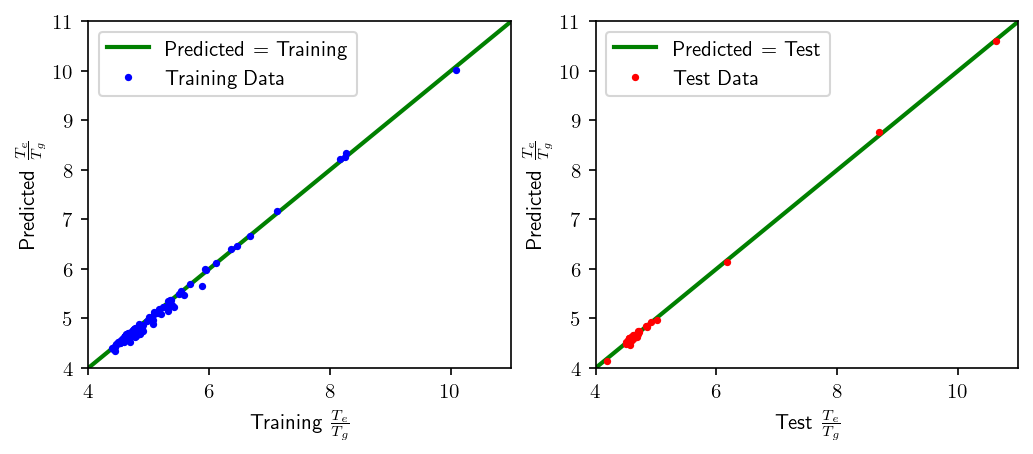

In [77]:
plt.figure(dpi=150, figsize=(8, 3))
plt.rcParams['text.usetex'] = True

plt.subplot(121)
plt.plot([-0.1,12], [-0.1,12], 'g-', lw=2, label = 'Predicted = Training')
plt.plot(y_train_val/(10.**0), y_pred_train[0]/(10.**0),'b.', ms=5, label = 'Training Data')
plt.xlim([4,11])
plt.ylim([4,11])
plt.xlabel(r'Training $\frac{T_e}{T_g}$')
plt.ylabel(r'Predicted $\frac{T_e}{T_g}$')
plt.legend()

plt.subplot(122)
plt.plot([-0.1,12], [-0.1,12], 'g-', lw=2, label = 'Predicted = Test')
plt.plot(y_test/(10.**0), y_pred_test[0]/(10.**0),'r.', ms=5, label = 'Test Data')
plt.xlim([4,11])
plt.ylim([4,11])
plt.xlabel(r'Test $\frac{T_e}{T_g}$')
plt.ylabel(r'Predicted $\frac{T_e}{T_g}$')
plt.legend()

plt.show()

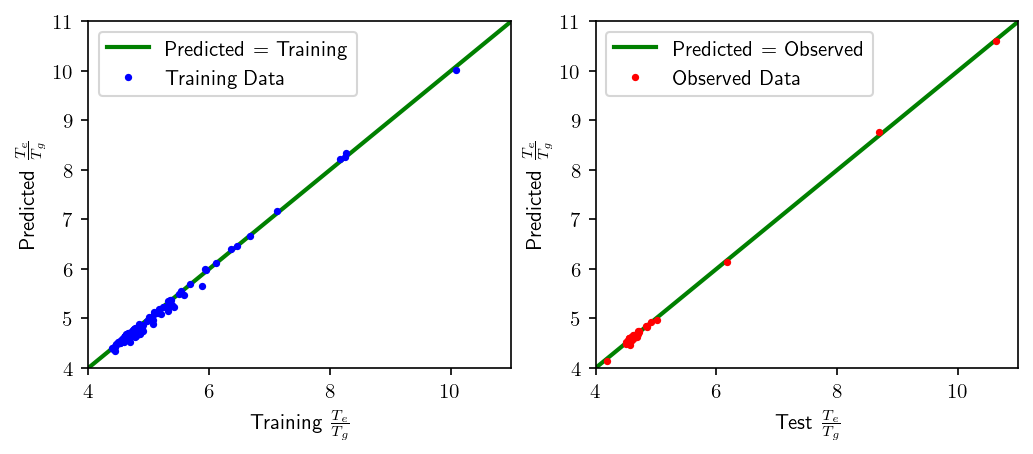

In [78]:
plt.figure(dpi=150, figsize=(8, 3))
plt.rcParams['text.usetex'] = True

plt.subplot(121)
plt.plot([-0.1,12], [-0.1,12], 'g-', lw=2, label = 'Predicted = Training')
plt.plot(y_train_val/(10.**0), y_pred_train[0]/(10.**0),'b.', ms=5, label = 'Training Data')
plt.xlim([4,11])
plt.ylim([4,11])
plt.xlabel(r'Training $\frac{T_e}{T_g}$')
plt.ylabel(r'Predicted $\frac{T_e}{T_g}$')
plt.legend()

plt.subplot(122)
plt.plot([-0.1,12], [-0.1,12], 'g-', lw=2, label = 'Predicted = Observed')
plt.plot(y_test/(10.**0), y_pred_test[0]/(10.**0),'r.', ms=5, label = 'Observed Data')
plt.xlim([4,11])
plt.ylim([4,11])
plt.xlabel(r'Test $\frac{T_e}{T_g}$')
plt.ylabel(r'Predicted $\frac{T_e}{T_g}$')
plt.legend()

plt.show()

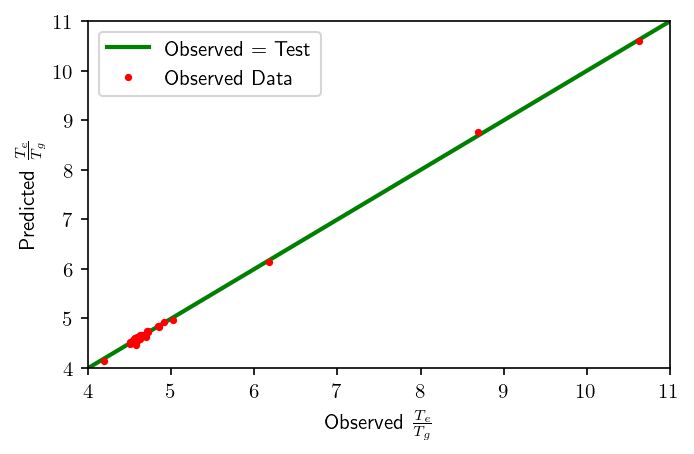

In [81]:
import matplotlib
import sys
sys.path.append("Users\vvmil\AppData\Local\Programs\MiKTeX")
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'
plt.figure(dpi=150, figsize=(5, 3))
#plt.rcParams['text.usetex'] = True



plt.plot([-0.1,12], [-0.1,12], 'g-', lw=2, label = 'Observed = Test')
plt.plot(y_test/(10.**0), y_pred_test[0]/(10.**0),'r.', ms=5, label = 'Observed Data')
plt.xlim([4,11])
plt.ylim([4,11])
plt.xlabel(r'Observed $\frac{T_e}{T_g}$')
plt.ylabel(r'Predicted $\frac{T_e}{T_g}$')
plt.legend()




current_path = r"C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\dimensionless_numbers_energy\base_terms"

test_parity_eb = current_path +r'\test_parity_eb_no_test.pdf'



plt.savefig(test_parity_eb,bbox_inches="tight")


plt.show()
